In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset

stud=pd.read_csv('stud.csv')

### DATA ASSESSMENT

In [3]:
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
stud.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [5]:
stud.shape

(1000, 8)

In [6]:
stud.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [7]:
stud.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [8]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Checking for missing values

stud.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
# Checking for duplicates

stud.duplicated().sum()

0

In [11]:
# Categorize the features into categorical features and numerical features

cat_cols=stud.columns[stud.dtypes=='object']
num_cols=stud.columns[stud.dtypes!='object']
print('Categorical features:',cat_cols)
print('Numerical features:',num_cols)

Categorical features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
Numerical features: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


#### ANALYSIS ON CATEGORICAL FEATURES

In [12]:
# check for imbalance in categorical features

print(stud["gender"].value_counts())
print(stud["race_ethnicity"].value_counts())
print(stud["parental_level_of_education"].value_counts())
print(stud["lunch"].value_counts())
print(stud["test_preparation_course"].value_counts())

female    518
male      482
Name: gender, dtype: int64
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
standard        645
free/reduced    355
Name: lunch, dtype: int64
none         642
completed    358
Name: test_preparation_course, dtype: int64


#### Visualize imbalance in categorical features

Text(0.5, 1.0, 'Count of test_preparation_course')

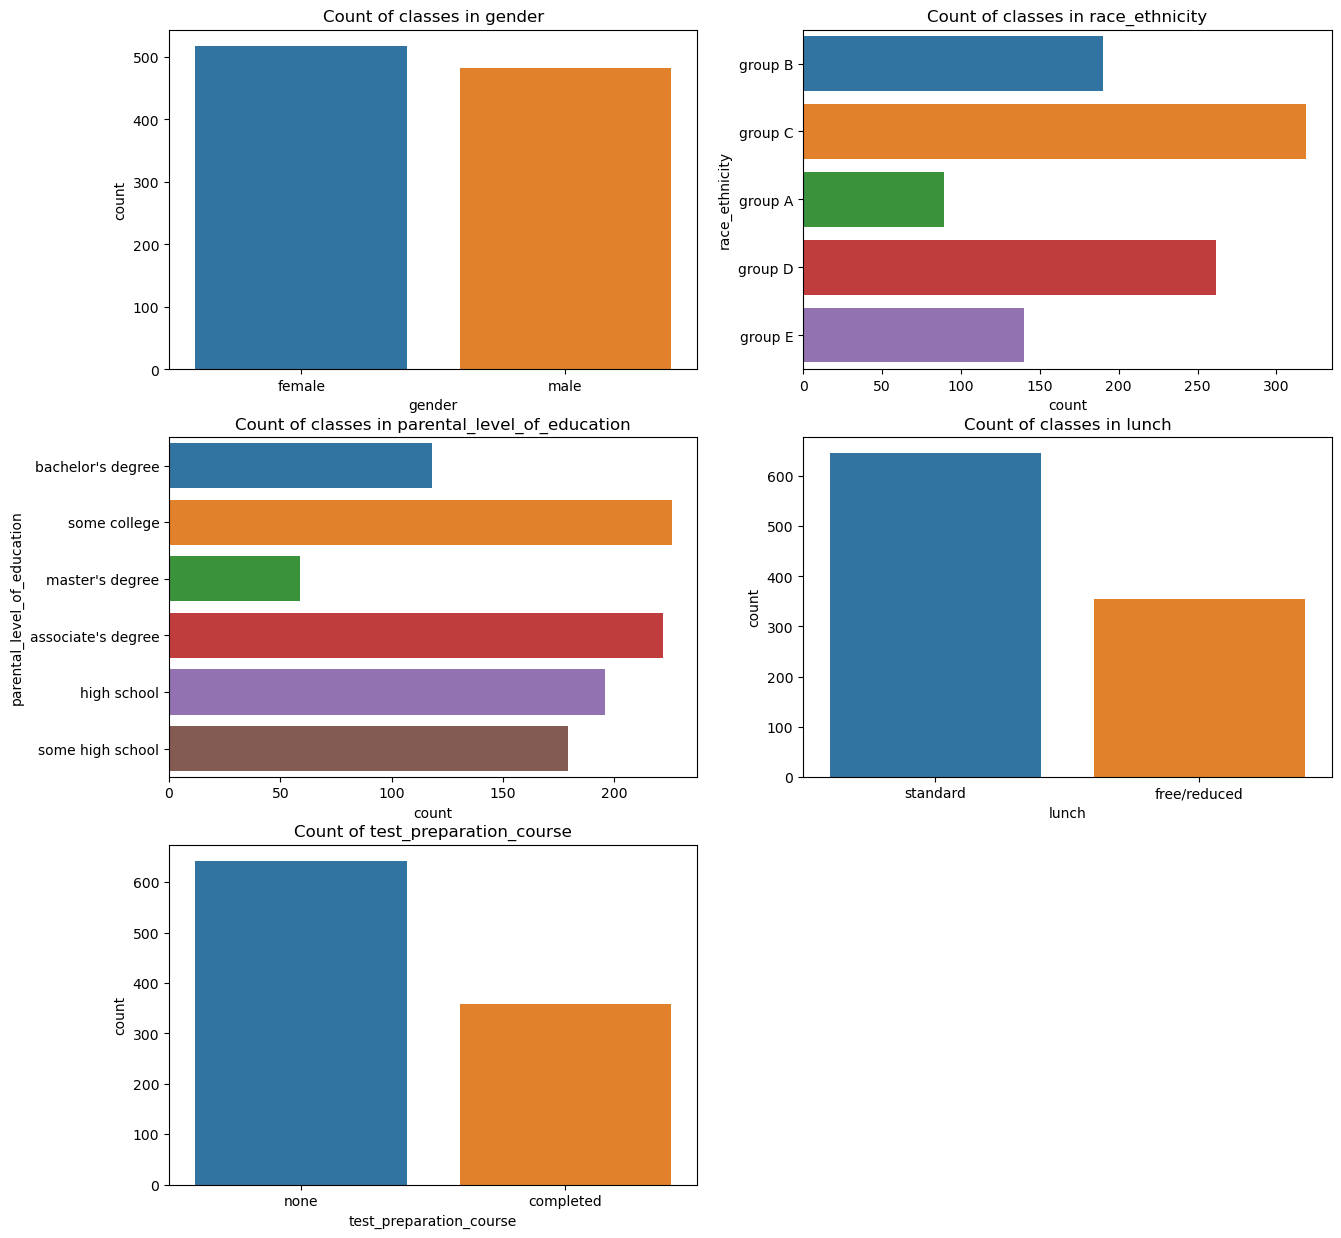

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.countplot(data=stud,x="gender")
plt.title('Count of classes in gender')

plt.subplot(322)
sns.countplot(data=stud,y="race_ethnicity")
plt.title('Count of classes in race_ethnicity')

plt.subplot(323)
sns.countplot(data=stud,y="parental_level_of_education")
plt.title('Count of classes in parental_level_of_education')

plt.subplot(324)
sns.countplot(data=stud,x="lunch")
plt.title('Count of classes in lunch')

plt.subplot(325)
sns.countplot(data=stud,x="test_preparation_course")
plt.title('Count of test_preparation_course')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


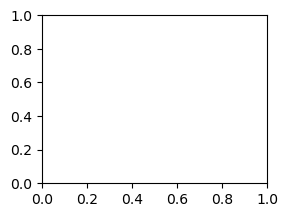

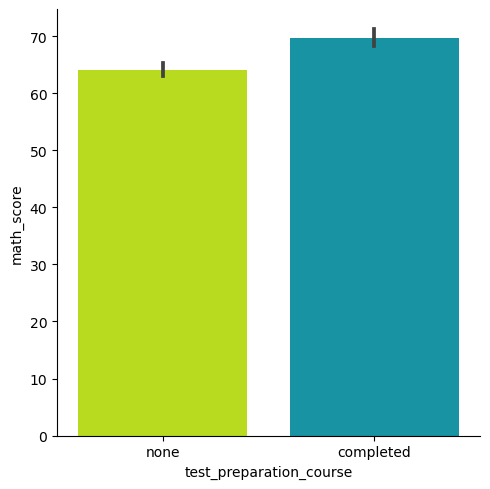

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


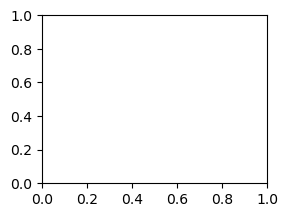

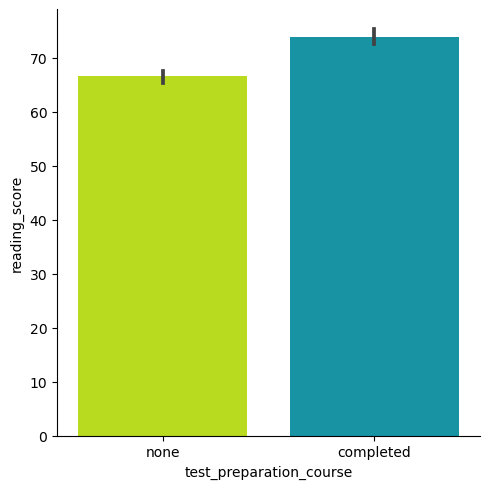

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


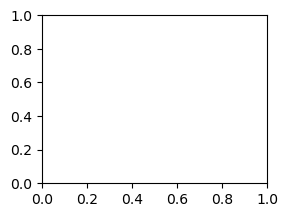

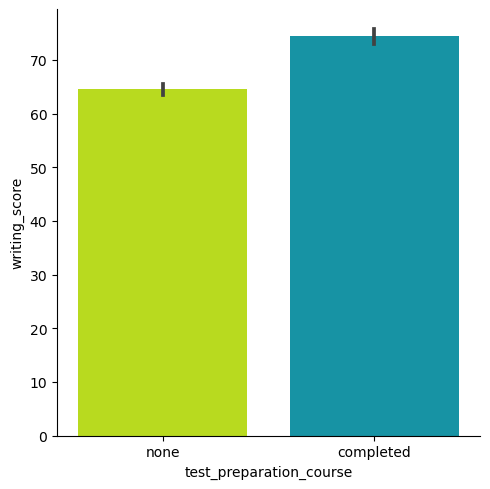

In [14]:
plt.subplot(221)
sns.catplot(data=stud, x='test_preparation_course', y='math_score', kind='bar', palette='nipy_spectral_r')
plt.show()

plt.subplot(222)
sns.catplot(data=stud, x='test_preparation_course', y='reading_score', kind='bar', palette='nipy_spectral_r')
plt.show()

plt.subplot(223)
sns.catplot(data=stud, x='test_preparation_course', y='writing_score', kind='bar', palette='nipy_spectral_r')
plt.show()

#### ANALYSIS ON NUMERICAL FEATURES
#### Correlation

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


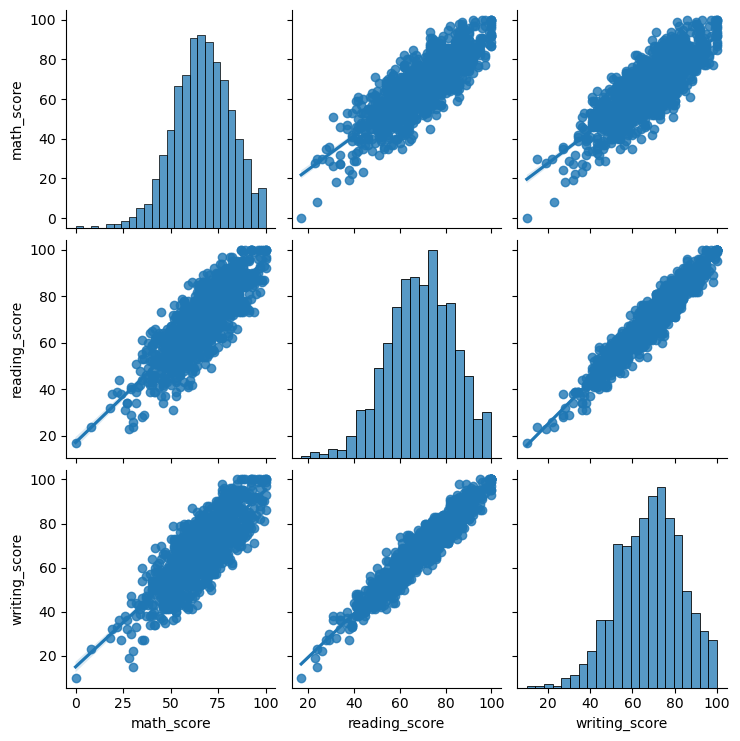

In [15]:
# To understand the distribution of features, relationships and potential patterns in numerical features

sns.pairplot(stud,kind='reg')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


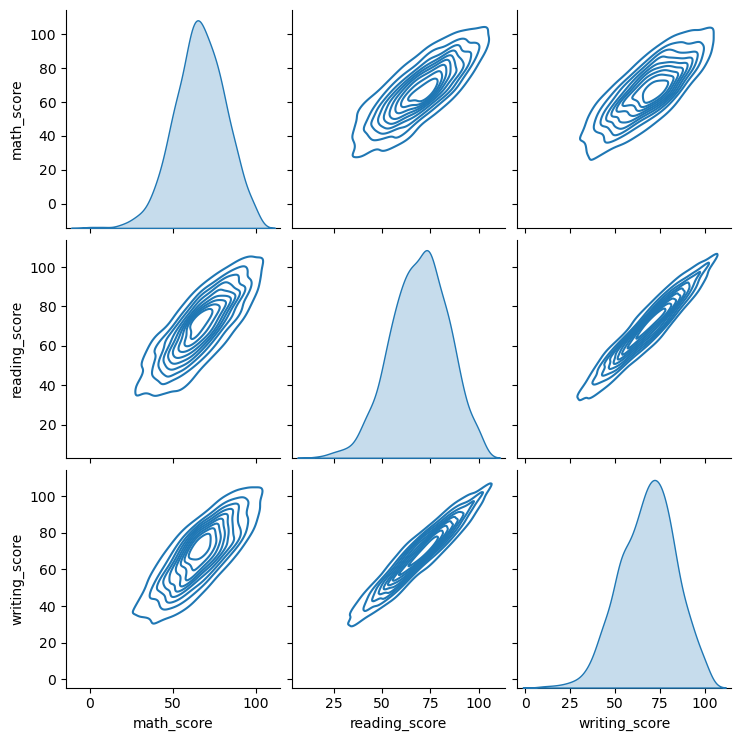

In [16]:
sns.pairplot(stud,kind='kde')

C:\Users\user\AppData\Local\Temp\ipykernel_2604\861697330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=stud.corr()


Text(0.5, 1.0, 'Correlation Matrix')

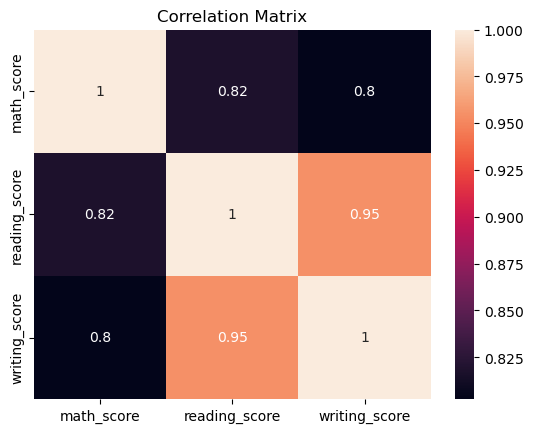

In [17]:
correlation_matrix=stud.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')

From the plots above, there is high correlation amongst students scores.

A student who reads well will write well.

#### Outlier Detection

Text(0.5, 1.0, 'Outlier in writing score')

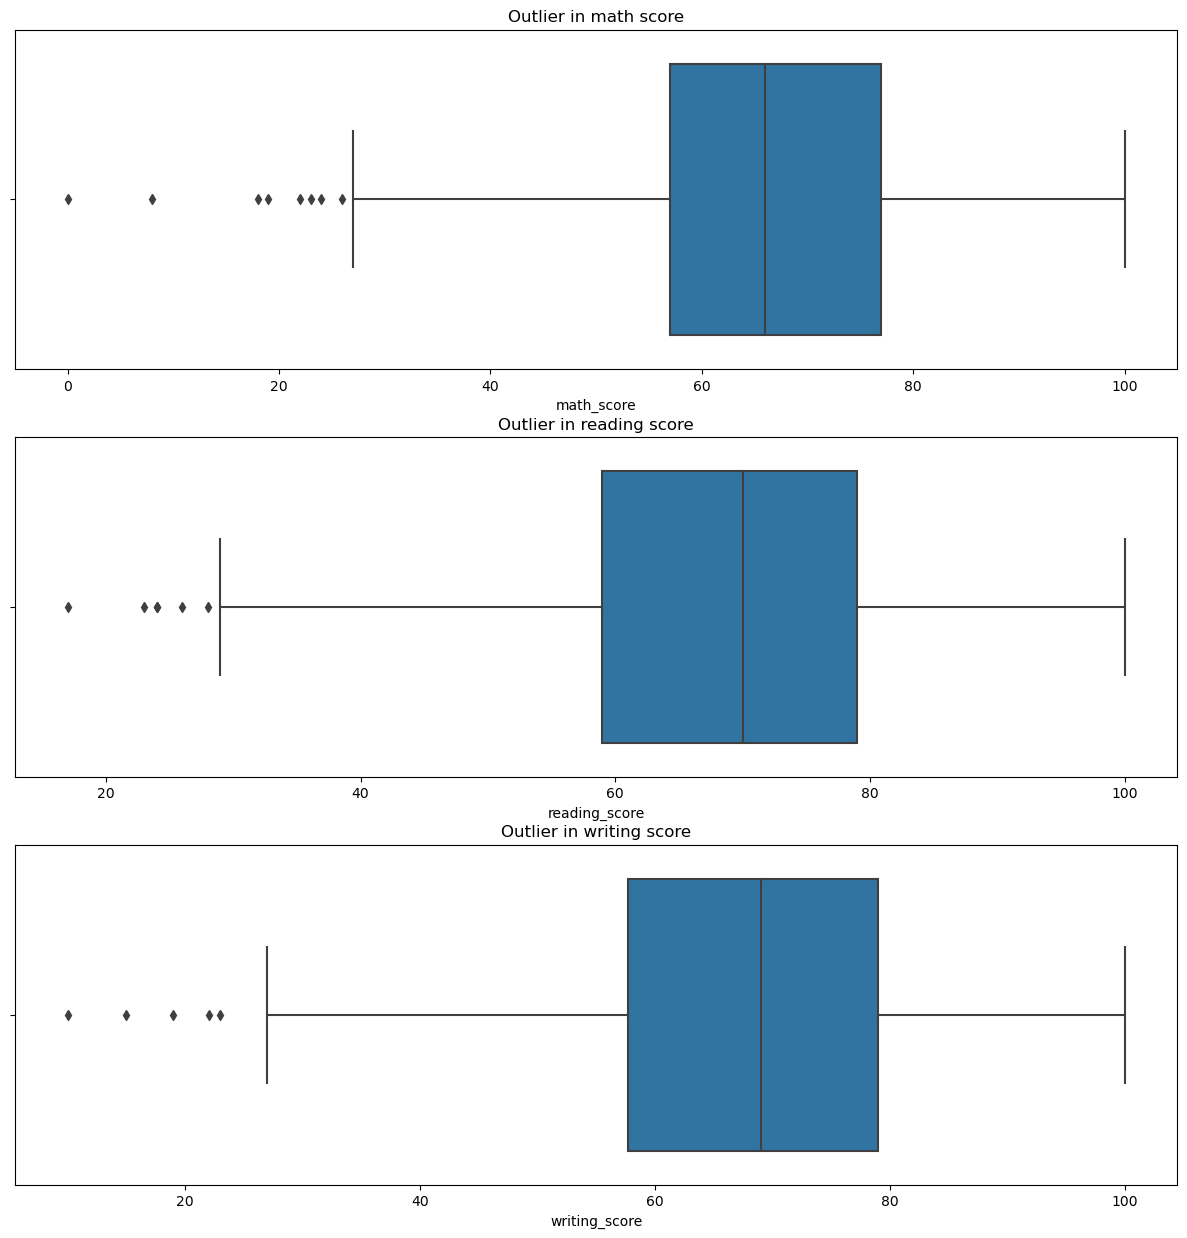

In [18]:
# Outlier detection using Boxplot

plt.figure(figsize=(15,15))

plt.subplot(311)
sns.boxplot(data=stud,x="math_score")
plt.title('Outlier in math score')

plt.subplot(312)
sns.boxplot(data=stud,x="reading_score")
plt.title('Outlier in reading score')

plt.subplot(313)
sns.boxplot(data=stud,x="writing_score")
plt.title('Outlier in writing score')

Overall students performance is between 60-80

In [19]:
def detect_outlier(column_name):
    Q1=stud[column_name].quantile(0.25)
    Q3=stud[column_name].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
   # return scores[(scores<=lower_bound) & (scores>=upper_bound)]
    outliers = stud[(stud[column_name] < lower_bound) | (stud[column_name] > upper_bound)]
    return outliers

outlier_in_math_score=detect_outlier("math_score")
outlier_in_reading_score=detect_outlier("reading_score")
outlier_in_writing_score=detect_outlier("writing_score")

print('Number of outlier in math score:',len(outlier_in_math_score))
print('Number of outlier in reading score:',len(outlier_in_reading_score))
print('Number of outlier in writing score:',len(outlier_in_writing_score))

Number of outlier in math score: 8
Number of outlier in reading score: 6
Number of outlier in writing score: 5


In [20]:
stud.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [21]:
def detect_outlier(column_name):
    Q1=stud[column_name].quantile(0.25)
    Q3=stud[column_name].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
   # Get the values at the lower and upper bounds
    lower_bound_value = stud[stud[column_name] < lower_bound][column_name].min()
    upper_bound_value = stud[stud[column_name] > upper_bound][column_name].max()
    
    # return scores[(scores>=lower_bound) & (scores<=upper_bound)]
    outliers = stud[(stud[column_name] < lower_bound) | (stud[column_name] > upper_bound)]
    
    return lower_bound, lower_bound_value, upper_bound, upper_bound_value, outliers
 
outliers_in_math_score=detect_outlier("math_score")
outliers_in_reading_score=detect_outlier("reading_score")
outliers_in_writing_score=detect_outlier("writing_score")

# Outliers in math score
print("\nOutliers in math score:")
print("\nLower Bound:", outliers_in_math_score[0])
print("Lower Bound Value:", outliers_in_math_score[1])
print("Upper Bound:", outliers_in_math_score[2])
print("Upper Bound Value:", outliers_in_math_score[3])
print(outliers_in_math_score[4])

# Outliers in reading score
print("\nOutliers in reading score:")
print("\nLower Bound:", outliers_in_reading_score[0])
print("Lower Bound Value:", outliers_in_reading_score[1])
print("Upper Bound:", outliers_in_reading_score[2])
print("Upper Bound Value:", outliers_in_reading_score[3])
print(outliers_in_reading_score[4])

# Outliers in writing score
print("\nOutliers in writing score:")
print("\nLower Bound:", outliers_in_writing_score[0])
print("Lower Bound Value:", outliers_in_writing_score[1])
print("Upper Bound:", outliers_in_writing_score[2])
print("Upper Bound Value:", outliers_in_writing_score[3])
print(outliers_in_writing_score[4])



Outliers in math score:

Lower Bound: 27.0
Lower Bound Value: 0
Upper Bound: 107.0
Upper Bound Value: nan
     gender race_ethnicity parental_level_of_education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none 

### DATA CLEANING

In [22]:
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Remove outlier

In [23]:
def remove_outlier(column_name):
    Q1 = stud[column_name].quantile(0.25)
    Q3 = stud[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the DataFrame
    cleaned_data = stud[(stud[column_name] >= lower_bound) & (stud[column_name] <= upper_bound)]
    
    return cleaned_data

# How to remove outliers in 'math score','reading score' & 'writing score' 
stud = remove_outlier('math_score')
stud = remove_outlier('reading_score')
stud = remove_outlier('writing_score')

# Printing the cleaned DataFrame
stud


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### FEATURE ENGINEERING
### Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
stud['gender']=le.fit_transform(stud['gender'])
stud['race_ethnicity']=le.fit_transform(stud['race_ethnicity'])
stud['parental_level_of_education']=le.fit_transform(stud['parental_level_of_education'])
stud['lunch']=le.fit_transform(stud['lunch'])
stud['test_preparation_course']=le.fit_transform(stud['test_preparation_course'])


In [25]:
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


### FEATURE SELECTION
### Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=stud.drop('math_score',axis=1)
y=stud.iloc[:,-3]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create a RandomForestRegressor model
rf=RandomForestRegressor(n_estimators=100,random_state=42)

# Feature selection with SelectFromModel
sfm=SelectFromModel(rf,threshold='median')
sfm.fit(X_train,y_train)

# Indices of selected features
selected_indices=sfm.get_support(indices=True)

# Names of selected features
selected_names=[f"feature_{index+1}" for index in selected_indices]

# Transform the training and testing sets with selected features
X_train_selected=sfm.transform(X_train)
X_test_selected=sfm.transform(X_test)

#Train the model with the selected features 
rf.fit(X_train_selected,y_train)

# Make prediction on the test set
y_pred=rf.predict(X_test_selected)

# Evaluate the model using Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

# Print the list of selected features
print('Selected Features:',selected_names)

print(f'Mean Squared Error:{mse}')

Selected Features: ['feature_1', 'feature_2', 'feature_6', 'feature_7']
Mean Squared Error:43.73975523638669


In [27]:
stud.head().T

,0,1,2,3,4
gender,0,0,0,1,1
race_ethnicity,1,2,1,0,2
parental_level_of_education,1,4,3,0,4
lunch,1,1,1,0,1
test_preparation_course,1,0,1,1,1
math_score,72,69,90,47,76
reading_score,72,90,95,57,78
writing_score,74,88,93,44,75


### MODEL EXPLORATION/EVALUATION

In [111]:
# Import models for exploration

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [126]:
# Split dataset into train and test sets
selected_feature=['race_ethnicity',
                 'parental_level_of_education',
                 'reading_score',
                 'writing_score'
                 ]

X=stud.drop('math_score',axis=1)  #Independent features 
y=stud.iloc[:,-3]    #Target features

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print("X_Train Shape:- ", X_train.shape)
print("X_Test Shape:- ", X_test.shape)
print("y_Train Shape:- ", y_train.shape)
print("y_Test Shape:- ", y_test.shape)

X_Train Shape:-  (788, 7)
X_Test Shape:-  (198, 7)
y_Train Shape:-  (788,)
y_Test Shape:-  (198,)


In [127]:
#X=stud[selected_feature]   #Independent features
#y=stud.iloc[:,-3]    #Target features

In [128]:
# define a funtion for model evaluation

def model_evaluation(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [129]:
# Define a list of regression models

models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNeighbors Regression": KNeighborsRegressor(),
    "Gradient Regression": GradientBoostingRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    
     # Train the model
    model.fit(X_train,y_train)
    
    # Make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # Evaluate Train and Test datasets
    model_train_mae, model_train_rmse, model_train_r2=model_evaluation(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2=model_evaluation(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('=' * 35)
    print('\n')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 15.4424
- Mean Absolute Error: 12.1536
- R2 Score: -0.1784
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16.3363
- Mean Absolute Error: 12.7727
- R2 Score: -0.2289


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4938
- Mean Absolute Error: 4.3990
- R2 Score: 0.8509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7219
- Mean Absolute Error: 4.4860
- R2 Score: 0.8492


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.4939
- Mean Absolute Error: 4.3988
- R2 Score: 0.8509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7192
- Mean Absolute Error: 4.4829
- R2 Score: 0.8494


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 6.3717
- Mean Absolute Error: 5.0541
- R2 Score: 0.79

#### Cross validation (CV)

In [130]:
# CV on GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

gradient_reg=GradientBoostingRegressor()

scores=cross_val_score(gradient_reg,X_train,y_train,cv=5,scoring='r2')

scores

array([0.8707581 , 0.8649121 , 0.84015585, 0.84187282, 0.80734648])

In [131]:
# CV on LinearRegression

from sklearn.model_selection import cross_val_score

lr=LinearRegression()

scores=cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')

scores

array([0.86278603, 0.87393351, 0.8377317 , 0.8418414 , 0.80909705])

In [132]:
# CV on RidgeRegression

from sklearn.model_selection import cross_val_score

ridge=Ridge()

scores=cross_val_score(ridge,X_train,y_train,cv=5,scoring='r2')

scores

array([0.86255392, 0.87420713, 0.83768189, 0.84192637, 0.80896279])

### BUILD MODEL

In [133]:
# GRADIENT BOOSTING REGRESSOR

gradient_reg=GradientBoostingRegressor(random_state=42)

gb_model=gradient_reg.fit(X_train,y_train)

y_pred=gb_model.predict(X_test)

y_pred[:5]

array([91.87769376, 98.03930821, 47.19335403, 73.29287599, 51.06423522])

In [134]:
y_test[:5]

623    100
458    100
741     37
443     73
280     53
Name: math_score, dtype: int64

In [135]:
# LINEAR REGRESSION

lr=LinearRegression(normalize=True)

lr_model=lr.fit(X_train,y_train)

y_pred=lr_model.predict(X_test)

y_pred[:5]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


array([89.86868434, 93.4500352 , 45.08521726, 70.21984019, 54.35937152])

In [136]:
# RIDGE REGRESSION

ridge=Ridge()

ridge_model=ridge.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)

y_pred[:5]

array([89.84337725, 93.44225149, 45.13056498, 70.24985576, 54.35096205])

### MODEL OPTIMIZATION

### Randomized Search

In [137]:
# GRADIENT BOOSTING REGRESSOR

from sklearn.model_selection import RandomizedSearchCV
gradient_reg=GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning
parameters={
    'n_estimators': np.arange(50,200,100),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

random_search= RandomizedSearchCV(gradient_reg, parameters, n_iter=50, cv=50, scoring='neg_mean_squared_error')

# Train the model
random_search.fit(X_train, y_train)

# Best parameters and model
best_parameters=random_search.best_params_
best_model=random_search.best_estimator_

# Evaluate the model
y_pred=best_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)

# Results
print('Best Hyperparameters:', best_parameters)
print('Test Mean Squared Error:', mse)

Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}
Test Mean Squared Error: 33.45954466607879


In [138]:
# GRADIENT BOOSTING REGRESSOR

gradient_reg=GradientBoostingRegressor(subsample=0.9, n_estimators=50, min_samples_split=2, min_samples_leaf=1,
                                       max_depth=4, learning_rate=0.1, random_state=42)

model=gradient_reg.fit(X_train,y_train)

y_pred=model.predict(X_test)

y_pred[:5]

array([89.67882471, 97.4798556 , 47.61330908, 72.7646302 , 49.75854359])

In [139]:
y_test[:5]

623    100
458    100
741     37
443     73
280     53
Name: math_score, dtype: int64